Name - Kushagra Kinjawadekar<br>
Place - Nagpur , Maharshtra

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(11.7,10)})

In [3]:
data = pd.read_csv('data.csv')

In [7]:
data.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,1437,0,0,0.000,1403,squad-fpp,31,29,-1,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,1225,0,0,0.000,1971,squad-fpp,30,30,-1,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,0,0,0,0.000,1741,solo-fpp,96,89,1516,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,56,1286,0,0,0.000,1738,squad-fpp,28,27,-1,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,0,1,1,7.737,2193,solo,99,95,1482,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


**Data fields**
- DBNOs - Number of enemy players knocked.

- assists - Number of enemy players this player damaged that were killed by teammates.

- boosts - Number of boost items used.

- damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.

- headshotKills - Number of enemy players killed with headshots.

- heals - Number of healing items used.

- Id - Player’s Id

- killPlace - Ranking in match of number of enemy players killed.

- killPoints - Kills-based external ranking of players. (Think of this as an Elo ranking where only                kills matter.) If there is a value other than -1 in rankPoints, then any 0 in                      killPoints should be treated as a “None”.

- killStreaks - Max number of enemy players killed in a short amount of time.

- kills - Number of enemy players killed.

- longestKill - Longest distance between player and player killed at time of death. This may be                     misleading, as downing a player and driving away may lead to a large longestKill stat .
               
                
- matchDuration - Duration of match in seconds.

- matchId - ID to identify matches. There are no matches that are in both the training and testing set.

- matchType - String identifying the game mode that the data comes from. The standard modes are  “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.

- rankPoints - Elo-like ranking of players. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes the place of “None”.

- revives - Number of times this player revived teammates.

- rideDistance - Total distance traveled in vehicles measured in meters.

- roadKills - Number of kills while in a vehicle.

- swimDistance - Total distance traveled by swimming measured in meters.

- teamKills - Number of times this player killed a teammate.

- vehicleDestroys - Number of vehicles destroyed.

- walkDistance - Total distance traveled on foot measured in meters.

- weaponsAcquired - Number of weapons picked up.

- winPoints - Win-based external ranking of players. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.

- groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.

- numGroups - Number of groups we have data for in the match.

- maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.

- winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

In [11]:
data.shape

(1111742, 30)

In [8]:
data.describe()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111741e+06
mean,2.224362e+06,2.336738e-01,1.106655e+00,1.307364e+02,6.573612e-01,2.266488e-01,1.370348e+00,4.759562e+01,5.044301e+02,9.255097e-01,5.448503e-01,2.299814e+01,1.579348e+03,4.450584e+01,4.300693e+01,8.927902e+02,1.641784e-01,6.042142e+02,3.551184e-03,4.545068e+00,2.401097e-02,7.833652e-03,1.153282e+03,3.659685e+00,6.057065e+02,4.727868e-01
std,1.283879e+06,5.894028e-01,1.716050e+00,1.711755e+02,1.146023e+00,6.033356e-01,2.683819e+00,2.747025e+01,6.274006e+02,1.562216e+00,7.129032e-01,5.106977e+01,2.589348e+02,2.381989e+01,2.327841e+01,7.366443e+02,4.704189e-01,1.495949e+03,7.385452e-02,3.061857e+01,1.678909e-01,9.194621e-02,1.182788e+03,2.461805e+00,7.395140e+02,3.073771e-01
min,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.112440e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,2.223772e+06,0.000000e+00,0.000000e+00,8.411000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,3.000000e+01,3.000000e+01,1.444000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.841000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,3.337954e+06,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,1.000000e+00,2.133000e+01,1.851000e+03,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,7.927500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.975000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,4.446964e+06,1.700000e+01,2.400000e+01,5.990000e+03,3.500000e+01,6.400000e+01,7.300000e+01,1.000000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.040000e+03,2.237000e+03,1.000000e+02,1.000000e+02,5.910000e+03,2.300000e+01,3.540000e+04,1.400000e+01,2.668000e+03,1.000000e+01,5.000000e+00,1.396000e+04,1.770000e+02,2.002000e+03,1.000000e+00


In [9]:
#Duplicate rows never helps hence next we will check for the duplicates
# Rows containing duplicate data
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 30)


There's no duplicate at all

In [12]:
data.isnull().sum()

Unnamed: 0         0
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

## Univariate and Bivariate  Analysis

**Lets first visualize the counts of categorical columns**

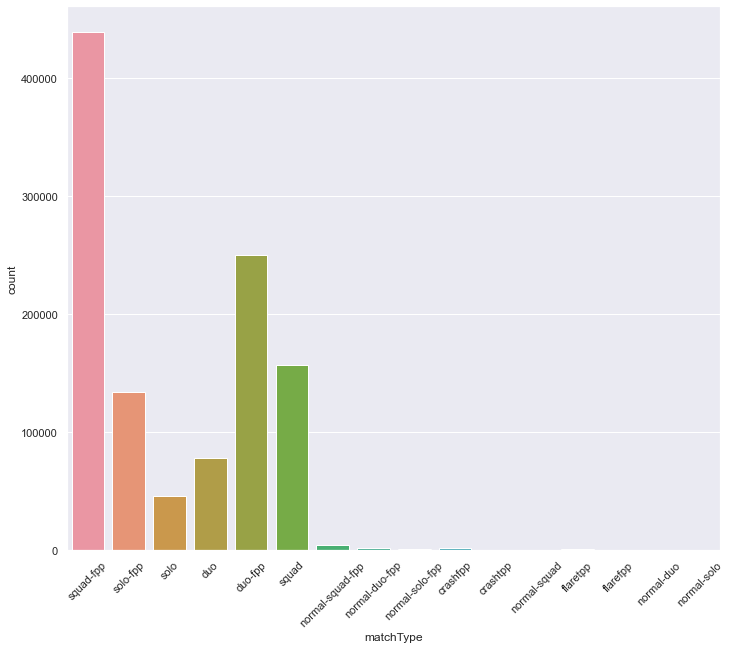

In [36]:
sns.countplot(data['matchType'])
plt.xticks(rotation=45)
plt.show()

We can see that most match-type are from squad-fpp.
For the analysis we will take data from matches of all types: solos, duos, squads, and custom.
Later we will analyse from each match-type point of view.

In [40]:
data['matchType'].value_counts()

squad-fpp           438781
duo-fpp             249927
squad               156573
solo-fpp            133854
duo                  78039
solo                 45679
normal-squad-fpp      4286
crashfpp              1581
normal-duo-fpp        1400
flaretpp               633
normal-solo-fpp        465
flarefpp               180
normal-squad           135
crashtpp                86
normal-solo             75
normal-duo              48
Name: matchType, dtype: int64

In [31]:
# Lets see how many total number of kills taken place per-match
match = data.groupby(['matchId']).count()['kills']
total_kills = match.sort_values(axis=0, ascending=False)
total_kills.head(5)


matchId
f7182fcc0d8cc8    42
7db80b78103e95    42
9bc88ae66d6f63    41
7a37a8d32b8a95    40
8e6b41411e5129    40
Name: kills, dtype: int64

We can see that max number for kills per match is 42.

In [32]:
total_kills.tail()

matchId
8799301e853202    1
37f05e2a01015f    1
475e676fadb37d    1
6fd4b1adb6da3c    1
998a86ce7ec062    1
Name: kills, dtype: int64

On the other hand, we have had few matches were just 1 player was killed

In [13]:
data.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,1437,0,0,0.000,1403,squad-fpp,31,29,-1,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,1225,0,0,0.000,1971,squad-fpp,30,30,-1,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,0,0,0,0.000,1741,solo-fpp,96,89,1516,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,56,1286,0,0,0.000,1738,squad-fpp,28,27,-1,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,0,1,1,7.737,2193,solo,99,95,1482,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


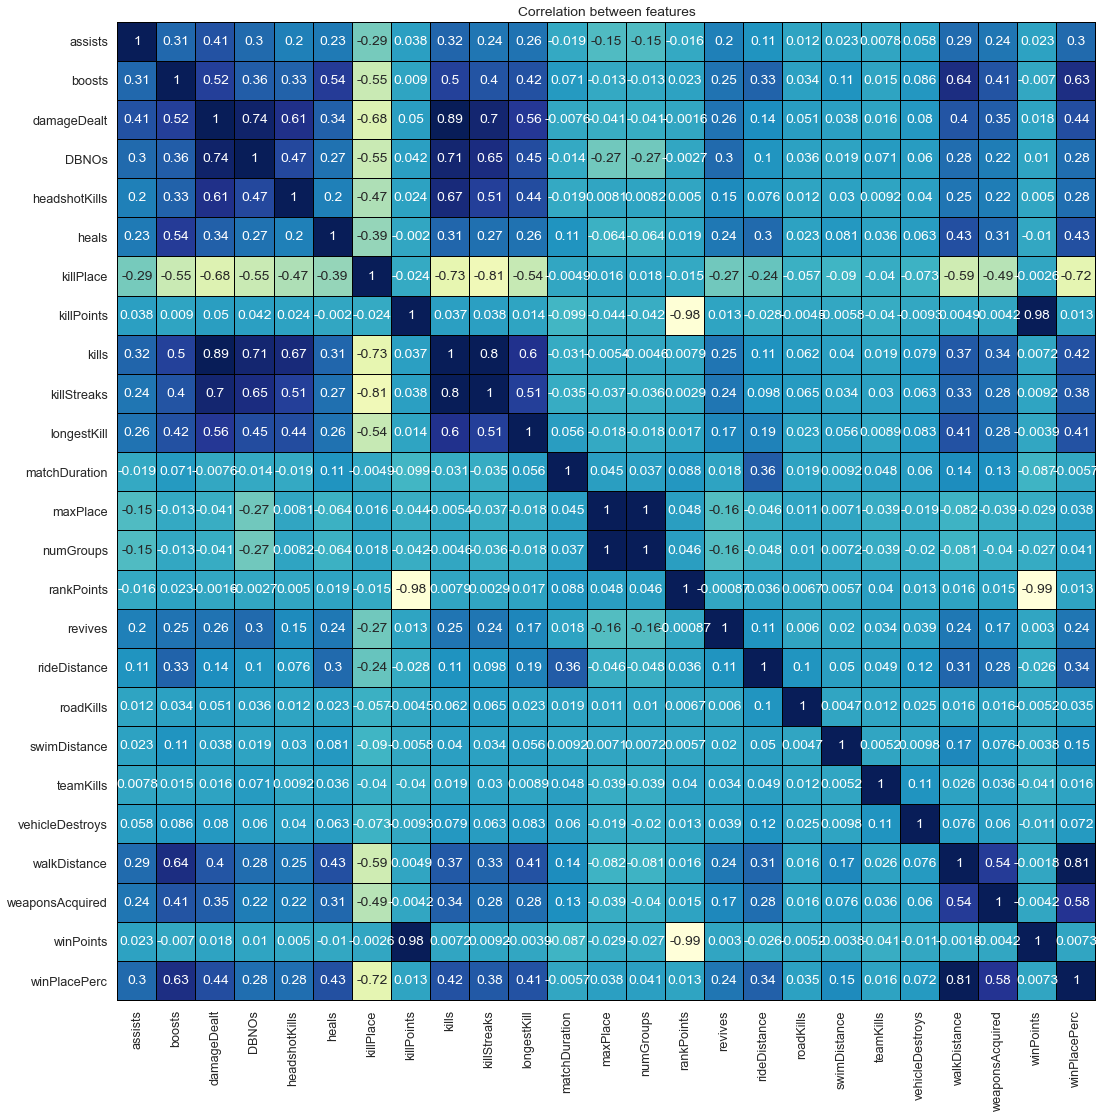

In [38]:
df_corr = data.iloc[:,3:] #Drop ID's
corr=df_corr.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(24, 18))

sns.heatmap(corr, vmax=.8, linewidths=0.01,square=True,annot=True,
            cmap='YlGnBu',linecolor="black",cbar=False)
plt.title('Correlation between features');

From the heatmap we can see the highly correlated values , and vice-versa. <br>
For eg. Kills points and Win points are highly correlated , and while creating model , we can drop either of this , to prevent curse of dimensionality.

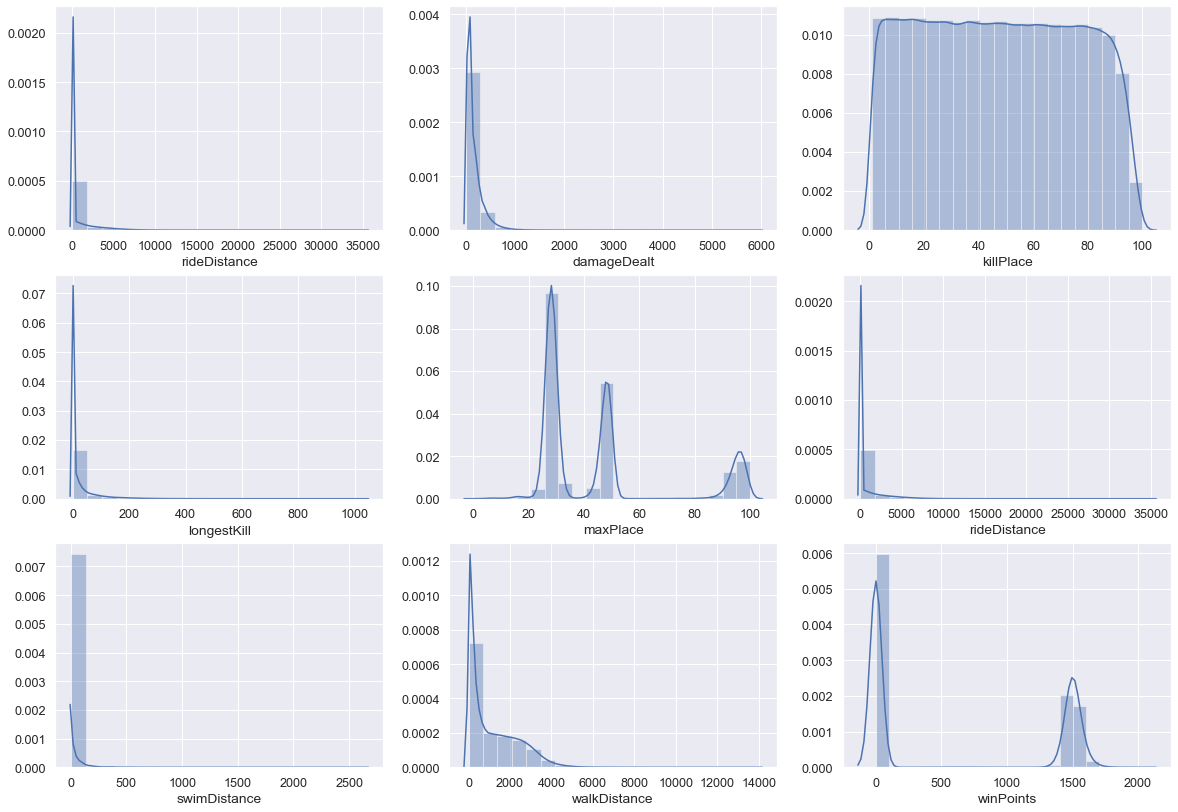

In [39]:
fig, ax = plt.subplots(3,3, figsize=(20, 14))
sns.distplot(data.rideDistance, bins = 20, ax=ax[0,0])  
sns.distplot(data.damageDealt, bins = 20, ax=ax[0,1]) 
sns.distplot(data.killPlace, bins = 20, ax=ax[0,2]) 
sns.distplot(data.longestKill, bins = 20, ax=ax[1,0]) 
sns.distplot(data.maxPlace, bins = 20, ax=ax[1,1]) 
sns.distplot(data.rideDistance, bins = 20, ax=ax[1,2]) 
sns.distplot(data.swimDistance, bins = 20, ax=ax[2,0]) 
sns.distplot(data.walkDistance, bins = 20, ax=ax[2,1]) 
sns.distplot(data.winPoints, bins = 20, ax=ax[2,2]) 
plt.show()

Except Kill-place which seemed Uniformly distributed , we can see that majority of distribution are pareto or log curve , since its obvious that the mode '0'is there, due to either player being offline or other.

In [43]:
data.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,1437,0,0,0.000,1403,squad-fpp,31,29,-1,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,1225,0,0,0.000,1971,squad-fpp,30,30,-1,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,0,0,0,0.000,1741,solo-fpp,96,89,1516,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,56,1286,0,0,0.000,1738,squad-fpp,28,27,-1,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,0,1,1,7.737,2193,solo,99,95,1482,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


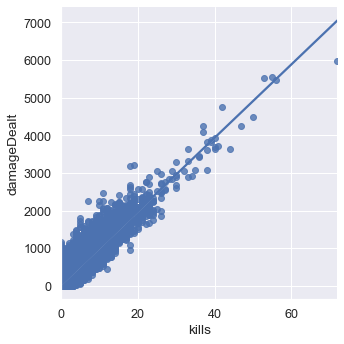

In [48]:
# Lets visualize individual columns
sns.lmplot(x='kills', y='damageDealt', data=data)


There's a linear relation between kills and damage-dealt as its obvious and can be seen with the help of heatmap also.

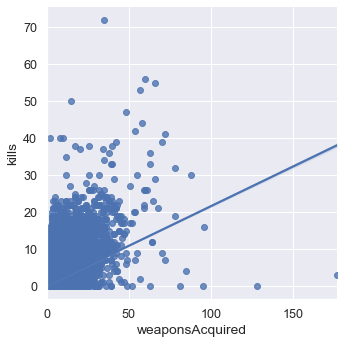

In [49]:

sns.lmplot(x='weaponsAcquired', y='kills', data=data)

As we can see that there is no linear relation between the weapons acquired vs kills , the no. of kills is based on skill and not the weapons.


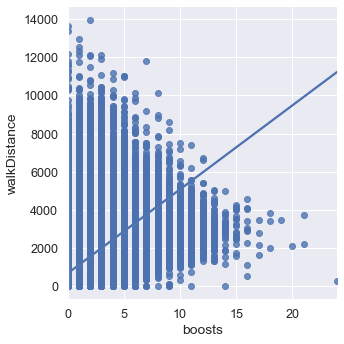

In [51]:
sns.lmplot(x='boosts', y='walkDistance', data=data)


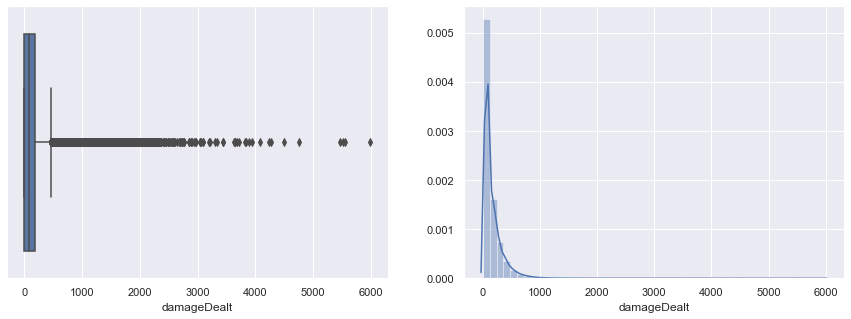

In [17]:
# Lets see how the damage-dealt taken place.
f, axes = plt.subplots(1,2)
f.set_figheight(5)
f.set_figwidth(15)
sns.boxplot(data['damageDealt'],ax =axes[0])
sns.distplot(data["damageDealt"],ax =axes[1])
plt.show()

In [23]:
print('Mode of the data :',data['damageDealt'].mode())
print('Mean of the data :',data['damageDealt'].mean())
print('Median of the data :',data['damageDealt'].median())

Mode of the data : 0    0.0
dtype: float64
Mean of the data : 130.73640731140858
Median of the data : 84.11


Observation:<br>
The reason the distribution of damage_dealt is pareto or logtype curve because, we can see that damage given by majority of players, is 0.<br>
We can covert this curve to normal using Box-Cox transformation when performing feature engineering.

## Solo FPP - Data analysis

In [52]:
# Isolate the solo games
solo_df = pd.DataFrame()
solo_df = data[data['matchType']=='solo-fpp'].copy()
solo_df.info()
# Checking if there aren't any duplicates or na's
solo_df.duplicated().value_counts()
solo_df.isna().any()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133854 entries, 2 to 1111738
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       133854 non-null  int64  
 1   Id               133854 non-null  object 
 2   groupId          133854 non-null  object 
 3   matchId          133854 non-null  object 
 4   assists          133854 non-null  int64  
 5   boosts           133854 non-null  int64  
 6   damageDealt      133854 non-null  float64
 7   DBNOs            133854 non-null  int64  
 8   headshotKills    133854 non-null  int64  
 9   heals            133854 non-null  int64  
 10  killPlace        133854 non-null  int64  
 11  killPoints       133854 non-null  int64  
 12  kills            133854 non-null  int64  
 13  killStreaks      133854 non-null  int64  
 14  longestKill      133854 non-null  float64
 15  matchDuration    133854 non-null  int64  
 16  matchType        133854 non-null  obj

Unnamed: 0         False
Id                 False
groupId            False
matchId            False
assists            False
boosts             False
damageDealt        False
DBNOs              False
headshotKills      False
heals              False
killPlace          False
killPoints         False
kills              False
killStreaks        False
longestKill        False
matchDuration      False
matchType          False
maxPlace           False
numGroups          False
rankPoints         False
revives            False
rideDistance       False
roadKills          False
swimDistance       False
teamKills          False
vehicleDestroys    False
walkDistance       False
weaponsAcquired    False
winPoints          False
winPlacePerc        True
dtype: bool

In [54]:
#Double checking if there's no other data than fpp-single
solo_df["revives"].value_counts()

0    133854
Name: revives, dtype: int64

In [55]:
#Since its solo we don't need certain columns.
solo_df.drop(["Id", "groupId", "DBNOs", "teamKills", "winPoints", "numGroups", "revives", "killPoints"], axis=1, inplace=True)

In [66]:
solo_df["kills"].describe()

count    133854.000000
mean          0.936109
std           1.495407
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          23.000000
Name: kills, dtype: float64

In [58]:
#Lets see the stats of guy with most kills
solo_df[solo_df["kills"]==23]

,Unnamed: 0,matchId,assists,boosts,damageDealt,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,rankPoints,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
232465,118093,c8a16bfa406795,0,5,2267.0,14,3,1,23,2,873.4,1773,solo-fpp,97,1500,2211.0,0,417.8,0,3324.0,4,0.9896


Guy with the highest kills did not win the game :(

In [64]:
#But let's see who actually won the game and how many kills did the winner have. I am going to use the matchId to get the game and look at the top 10 positions.
solo_df[(solo_df["matchId"]=='c8a16bfa406795')&(solo_df["winPlacePerc"]>=0.9)]

,Unnamed: 0,matchId,assists,boosts,damageDealt,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,rankPoints,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
189471,3630440,c8a16bfa406795,0,4,100.0,1,5,23,1,1,24.57,1773,solo-fpp,97,1535,0.0000,0,0.00,0,3170.0,6,0.9271
232465,118093,c8a16bfa406795,0,5,2267.0,14,3,1,23,2,873.40,1773,solo-fpp,97,1500,2211.0000,0,417.80,0,3324.0,4,0.9896
282378,1439848,c8a16bfa406795,0,6,67.0,0,4,22,1,1,198.20,1773,solo-fpp,97,1500,3016.0000,0,51.18,0,2341.0,6,0.9792
351167,1243966,c8a16bfa406795,0,3,214.5,0,2,12,2,1,162.70,1773,solo-fpp,97,1561,1395.0000,0,0.00,0,2041.0,6,0.9062
1069225,1487795,c8a16bfa406795,0,1,0.0,0,1,40,0,0,0.00,1773,solo-fpp,97,1551,0.0051,0,16.62,0,5635.0,4,0.9167


As we can see that no one actually won the game or either the data for that guy is not availabel :(

In [68]:
#IMP ANALYSIS 
#Lets see the stats of all those guys who won the matches.
solo_win = solo_df[solo_df['winPlacePerc']==1]
print(solo_win.shape)

(1431, 22)


Here we can see that out of 133854 data we got only 1431 players data who won the match.

In [84]:
solo_win.head(10)

,Unnamed: 0,matchId,assists,boosts,damageDealt,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,rankPoints,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
665,1329508,afd0362bcdc6a1,0,4,97.89,0,1,12,2,1,51.78,1535,solo-fpp,98,-1,0.0,0,115.60,0,2579.0,5,1.0
1207,2795669,20b2d261509f23,0,6,636.40,1,1,1,6,1,94.21,1375,solo-fpp,99,1634,0.0,0,0.00,0,2173.0,5,1.0
2200,2219456,bcd7b0a44317b0,0,9,478.20,0,8,2,5,1,97.45,2188,solo-fpp,97,1952,990.6,0,0.00,0,4307.0,6,1.0
3357,471567,f32aa2c1a33aa2,0,4,648.30,2,4,2,6,1,57.96,1423,solo-fpp,97,-1,937.7,0,0.00,0,1906.0,6,1.0
6440,327591,28b24b95680cea,0,7,655.80,2,5,2,7,1,190.10,1201,solo-fpp,94,1539,0.0,0,0.00,0,2730.0,6,1.0
7060,3301893,df2799f3d69a0b,0,4,267.90,1,1,9,3,1,42.77,1384,solo-fpp,97,-1,0.0,0,138.50,0,2503.0,5,1.0
7082,1522449,e36de3490946e7,0,5,952.20,6,3,1,12,2,149.00,1366,solo-fpp,95,1533,0.0,0,50.02,0,2876.0,4,1.0
7187,1351241,19838bb2c8e3c2,0,5,318.40,1,0,8,3,1,131.30,1478,solo-fpp,90,1518,0.0,0,0.00,0,2401.0,6,1.0
8534,4311164,31c7e95977e44d,1,3,419.70,1,1,5,4,1,51.95,1390,solo-fpp,93,-1,0.0,0,0.00,0,3692.0,4,1.0
8933,2883597,142fa0f4e87cc9,0,5,434.30,1,1,4,4,2,30.23,1432,solo-fpp,98,-1,0.0,0,0.00,0,2567.0,4,1.0


In [69]:
solo_win.describe()

,Unnamed: 0,assists,boosts,damageDealt,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchDuration,maxPlace,rankPoints,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
count,1.431000e+03,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.0
mean,2.277085e+06,0.235500,5.676450,630.156464,1.872117,3.511530,3.544375,6.016073,1.243885,112.655770,1580.777079,94.566737,974.661775,1297.729457,0.006289,14.012559,0.018868,2900.386164,5.705101,1.0
std,1.298615e+06,0.494471,2.600322,310.603185,1.676159,3.879258,4.262122,2.952139,0.468508,79.547948,251.789756,6.656790,780.261826,2469.106319,0.079083,49.346285,0.136106,883.183308,2.066982,0.0
min,1.688000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1044.000000,19.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,623.600000,2.000000,1.0
25%,1.159887e+06,0.000000,4.000000,401.150000,1.000000,1.000000,1.000000,4.000000,1.000000,56.670000,1377.500000,94.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2297.500000,4.000000,1.0
50%,2.280877e+06,0.000000,6.000000,586.900000,2.000000,2.000000,2.000000,6.000000,1.000000,93.620000,1442.000000,96.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,2836.000000,5.000000,1.0
75%,3.383402e+06,0.000000,7.000000,817.300000,3.000000,5.000000,4.000000,8.000000,1.000000,147.100000,1858.000000,97.000000,1566.000000,1825.500000,0.000000,0.000000,0.000000,3413.000000,7.000000,1.0
max,4.443630e+06,4.000000,21.000000,2047.000000,11.000000,40.000000,46.000000,18.000000,5.000000,854.600000,2199.000000,100.000000,2454.000000,35400.000000,1.000000,604.500000,1.000000,6577.000000,17.000000,1.0


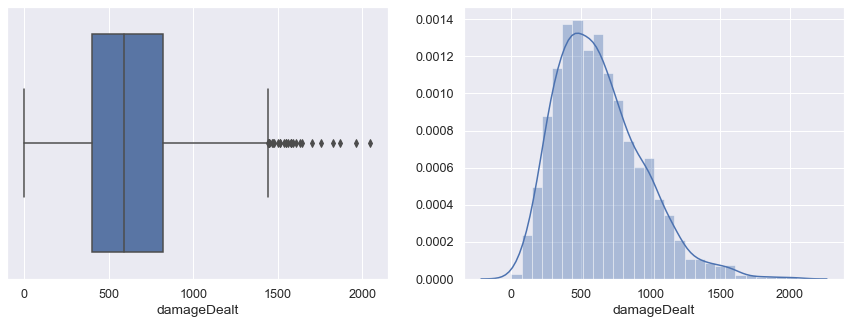

Mode of the data : 0    300.0
dtype: float64
Mean of the data : 630.156464011181
Median of the data : 586.9


In [78]:
f, axes = plt.subplots(1,2)
f.set_figheight(5)
f.set_figwidth(15)
sns.boxplot(solo_win['damageDealt'],ax =axes[0])
sns.distplot(solo_win["damageDealt"],ax =axes[1])
plt.show()
print('Mode of the data :',solo_win['damageDealt'].mode())
print('Mean of the data :',solo_win['damageDealt'].mean())
print('Median of the data :',solo_win['damageDealt'].median())

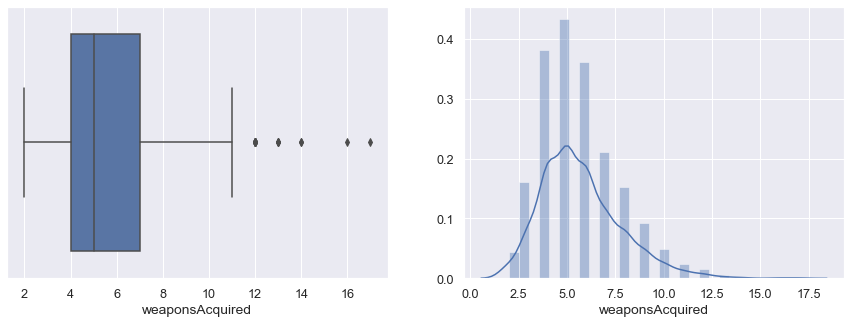

Mode of the data : 0    5
dtype: int64
Mean of the data : 5.705101327742837
Median of the data : 5.0


In [79]:
f, axes = plt.subplots(1,2)
f.set_figheight(5)
f.set_figwidth(15)
sns.boxplot(solo_win['weaponsAcquired'],ax =axes[0])
sns.distplot(solo_win["weaponsAcquired"],ax =axes[1])
plt.show()
print('Mode of the data :',solo_win['weaponsAcquired'].mode())
print('Mean of the data :',solo_win['weaponsAcquired'].mean())
print('Median of the data :',solo_win['weaponsAcquired'].median())

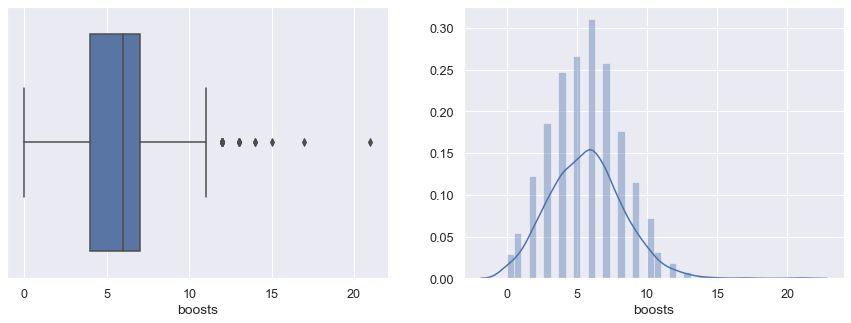

Mode of the data : 0    6
dtype: int64
Mean of the data : 5.676450034940601
Median of the data : 6.0


In [83]:
f, axes = plt.subplots(1,2)
f.set_figheight(5)
f.set_figwidth(15)
sns.boxplot(solo_win['boosts'],ax =axes[0])
sns.distplot(solo_win["boosts"],ax =axes[1])
plt.show()
print('Mode of the data :',solo_win['boosts'].mode())
print('Mean of the data :',solo_win['boosts'].mean())
print('Median of the data :',solo_win['boosts'].median())

Avg boosts used by winning players is 6  

***Q) My friend claims that , whenever his avg weapons acquired are greater than 3 , he has more chance to win the game?***


In [73]:
#lets test this claim with Hypothesis testing.
#We will use Z test, to actually see if that happens or not.

Alternate Hypothesis (Bold claim): $$ H_1:~~avg~weapons~acquired>3 $$
Null Hypothesis (Status Quo)     : $$ H_0:~~avg~weapons~acquired<=3 $$ 

Using <br>
$$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}} $$

In [80]:
from scipy.stats import norm
import statistics as st


n = solo_win.shape[0] #No of observation

x_bar = 3 #Given mean value

mu = st.mean(solo_win['weaponsAcquired']) #sample mean
print("Mean of data is :", mu)

std = st.stdev(solo_win['weaponsAcquired']) #sample std deviation
print("Std.deviation of data is :",std )

z_score = (x_bar-mu)/(std/((n)**0.5)) #tscore value
print("z-score value is :",z_score)

confidence_level = 0.95
alpha = 1- confidence_level

z_critical = norm.ppf(1-alpha)
print("z_critical value is :",z_critical)
print(40*'*')
if z_critical>z_score:
    print("Failed to reject the null hypothesis")
else:
    print("Reject Null Hypothesis")
print(40*'*')    

Mean of data is : 5.705101327742837
Std.deviation of data is : 2.0669819829155593
z-score value is : -49.507006087279606
z_critical value is : 1.6448536269514722
****************************************
Failed to reject the null hypothesis
****************************************


Hence with 95% confidence we can say that the claim of my friend is False and the chances of winning is not great even though having more than 3 acquired weapons.

In [89]:
#Lets DA for those who are snake? XD
snake = solo_df[(solo_df["kills"]==0)&(solo_df["winPlacePerc"]==1.0)]
snake

,Unnamed: 0,matchId,assists,boosts,damageDealt,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,rankPoints,rideDistance,roadKills,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
406826,1517391,c044bb02f16da6,1,3,207.9,0,1,44,0,0,0.0,1888,solo-fpp,95,1812,4698.0,0,0.0,0,1820.0,5,1.0
898970,4073632,47bf06e8fc98a7,1,6,162.5,0,7,43,0,0,0.0,1451,solo-fpp,95,1530,0.0,0,0.0,0,2520.0,4,1.0
975222,219312,c8cd99c3c148b4,0,6,0.0,0,0,46,0,0,0.0,1533,solo-fpp,96,1514,0.0,0,0.0,0,2162.0,4,1.0


In [91]:
print("Winning chance being a snake :", (len(snake)/len(solo_win)))

Winning chance being a snake : 0.0020964360587002098


- Lol There's only 3 matches where those who didn't have a single kill won . <br>
- Out of which 2 lucky dudes didn't even move at all, that means they were at same place for the     whole time. ( Real snakes)<br>
- Even though they rode and walked a lot and acquired quite a lot of weapons. So it's not like they   could not do any damage. They just chose not to fight, i guess. 

In [87]:
# Q) Is stealth the way to win, i.e no use of vehicle at all ?
stealth = solo_df.loc[(solo_df['rideDistance']==0) & (solo_df['winPlacePerc']==1) ]
stealth.shape

(805, 22)

In [90]:
#Winning percentage of stelth
print("Win percentage of Stealth tech is :", (len(stealth)/len(solo_win))*100)

Win percentage of Stealth tech is : 56.25436757512229


## Conclusions

**1) We can see that for win , the players have travelled a lot. Which includes swimming distance , walk distance etc.**

**2) Boosts are more important than you think, we cay observe that those with >5 boosts tend to win a lot.**

**3) There's 56% chance that avoiding vehicles during solo game play , we will win the game.**

**4) Being a snake does not really help. There's literally (0.002 % ) no chance of winning , just pure luck. Hence avoiding a fight doesn't help.**

**5) Damage dealth with killings, and vehicle accounts the most.**

**6) Acquiring a lot weapons doesn't really helps , winning is based on skill.**